In [1]:
'''
CS256 Assignment 11
Date 12.01.2018
Create a hierarchical graphic with California as the root, 
showing the Bay Area counties and the largest cities they contain. Due 12/2.
https://en.wikipedia.org/wiki/List_of_cities_and_towns_in_the_San_Francisco_Bay_Area
'''

import numpy as np
import matplotlib.pyplot as plt


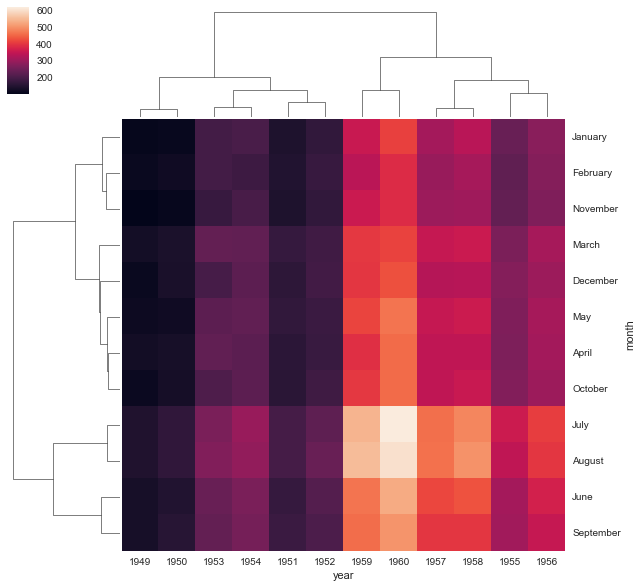

In [2]:
import seaborn as sns; sns.set()
flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")
flights
g = sns.clustermap(flights)

In [3]:
import pandas as pd
theta = np.linspace(0, np.pi * 2, 9, endpoint=False)
theta1 = np.linspace(0, 360, 9, endpoint=False)
y = np.ones(9)
df = pd.read_csv("bayarea-county-city-short.csv") # contains list of bay area counties and their prominent cities
df = df.fillna('')

bayarea_cities = dict()
for i in range(len(df['Name'])):
    bayarea_cities[df['Name'][i]] = df['County'][i]

bayarea_counties = {1: 'San Francisco', 2: 'Contra Costa', 3: 'Marin', 4: 'Napa', 5: 'Alameda', 6: 'San Mateo', 
                    7: 'Santa Clara', 8: 'Solano', 9: 'Sonoma'}
counties = list(bayarea_counties.values())
county = list(set(df['County']))
theta
bayarea_cities # three prominent cities in the bay area are chosen for each county

{'American Canyon': 'Napa',
 'Antioch': 'Contra Costa',
 'Berkeley': 'Alameda',
 'Concord': 'Contra Costa',
 'Daly City': 'San Mateo',
 'Fairfield': 'Solano',
 'Fremont': 'Alameda',
 'Napa': 'Napa',
 'Novato': 'Marin',
 'Oakland': 'Alameda',
 'Petaluma': 'Sonoma',
 'Redwood City': 'San Mateo',
 'Richmond': 'Contra Costa',
 'Rohnert Park': 'Sonoma',
 'St. Helena': 'Napa',
 'San Francisco': 'San Francisco',
 'San Jose': 'Santa Clara',
 'San Mateo': 'San Mateo',
 'San Rafael': 'Marin',
 'Santa Clara': 'Santa Clara',
 'Santa Rosa': 'Sonoma',
 'Sausalito': 'Marin',
 'Sunnyvale': 'Santa Clara',
 'Vacaville': 'Solano',
 'Vallejo': 'Solano'}

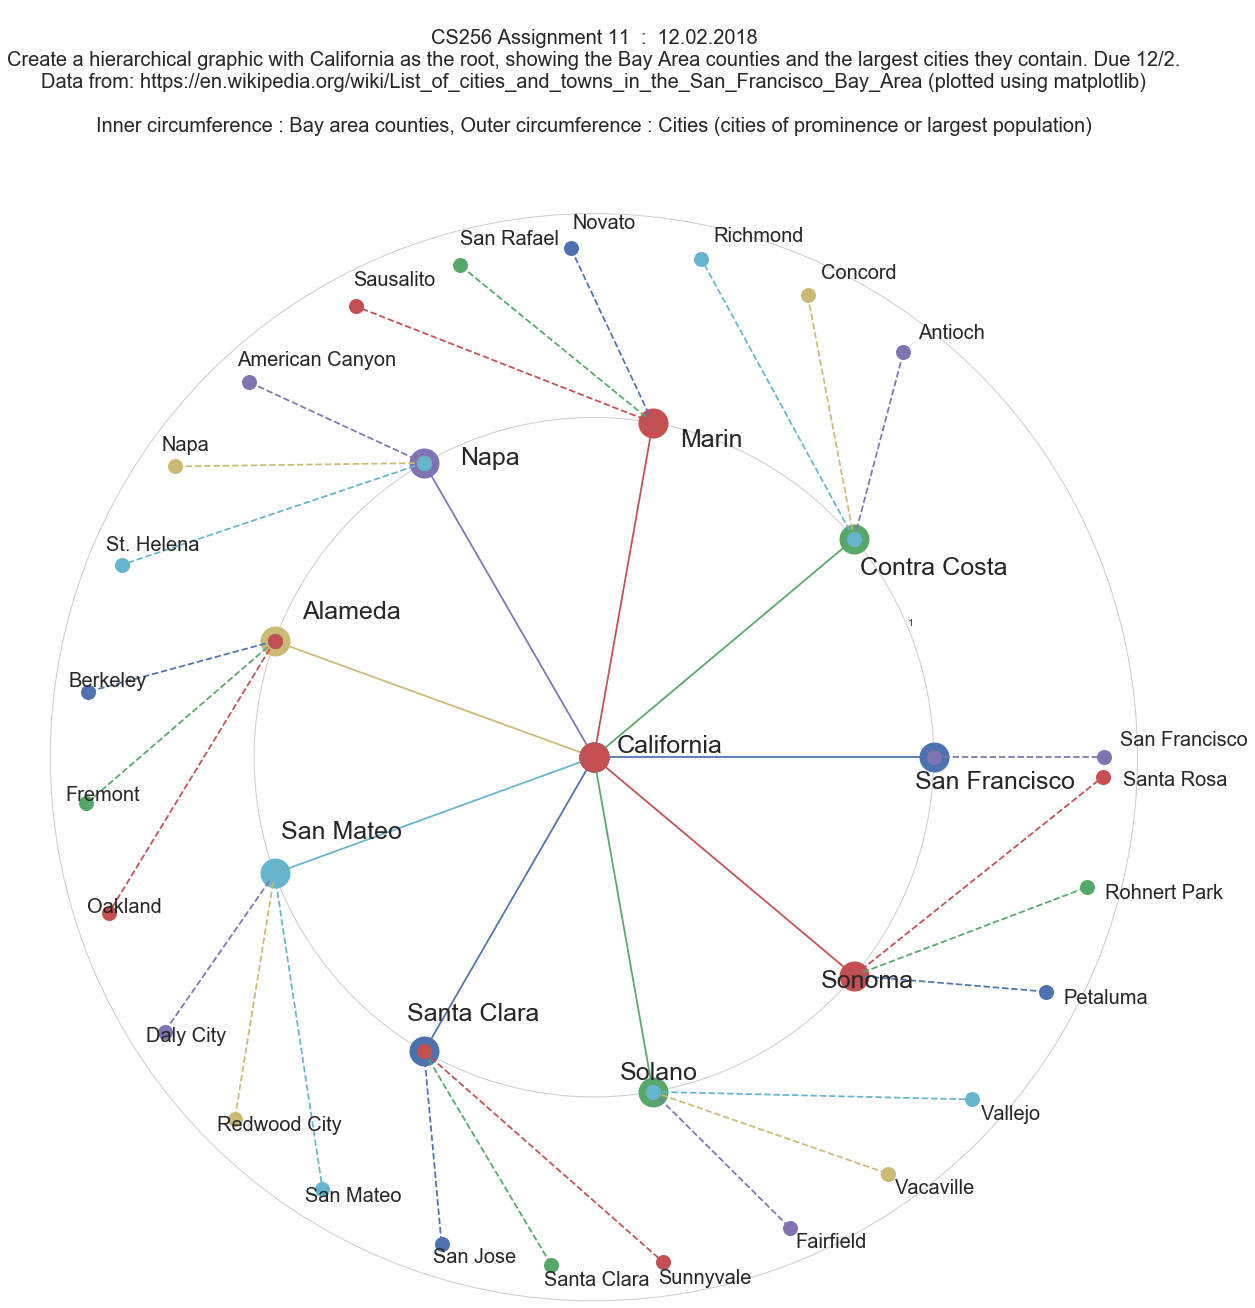

In [18]:
plt.rcParams["figure.figsize"] = (20, 20)

ax = plt.subplot(111, polar = True)

# plotting the bay area counties
for i in list(bayarea_counties.keys()):
    line = ax.plot((0, theta[i-1]), (0, y[i-1]), '-o', markersize = 30)        
    plt.text(theta[i-1] - 0.095, 0.95, counties[i-1], fontsize = 25);
    
# plotting the main cities of the counties outside of SF    
for i in range(1,9):
    for j in range(1,4):
        line1 = plt.polar((theta[i], theta[i] + j * 0.22), (1, 1.5),'--o', markersize = 15)
        
for i in range(1, len(counties)): 
    cities = [k for k,v in bayarea_cities.items() if v == counties[i]]
    for j in range(len(cities)):
        plt.text(theta[i] + (j+1) * 0.215, 1.56, cities[j], fontsize = 20);    
    
# label = ax.set_thetagrids(angles = theta1, labels = counties, fontsize = 15);
# plot and label for SF
line1 = plt.polar((theta[0], theta[0]),  (1, 1.5),'--o', markersize = 15)
plt.text(theta[0]+ 0.0225, 1.55, counties[0], fontsize = 20);    
ax.set_rmax(1.6)
plt.text(0.2, 0.07, 'California', fontsize = 25);
ax.xaxis.set_visible(False)
ax.set_yticks([1]) 
# print(plt.style.available)
plt.style.use('seaborn-whitegrid')
plt.title('''
CS256 Assignment 11  :  12.02.2018
Create a hierarchical graphic with California as the root, showing the Bay Area counties and the largest cities they contain. Due 12/2.
Data from: https://en.wikipedia.org/wiki/List_of_cities_and_towns_in_the_San_Francisco_Bay_Area (plotted using matplotlib)

Inner circumference : Bay area counties, Outer circumference : Cities (cities of prominence or largest population)
''', fontsize = 20);